<a href="https://colab.research.google.com/github/kazeo48/MAchine-Learning/blob/main/PROSES_ANALISA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Install library nltk (natural language tool-kit)
!pip install nltk
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize

!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
TWEET_DATA = pd.read_excel("/content/drive/MyDrive/preprocessing_lgbt (13).xlsx", usecols=["Label", "Retokenizing"])
TWEET_DATA.columns = ["Retokenizing","Label"]

TWEET_DATA.head()

,Retokenizing,Label
0,"['sekarang', 'lagi', 'ngetrend', 'lgbt', 'yah'...",negatif
1,"['meta', 'juga', 'lindung', 'komunitas', 'lgbt...",positif
2,"['tidak', 'boleh', 'bilang', 'lgbt', 'adalah',...",negatif
3,"['negara', 'ni', 'banyak', 'bala', 'bukan', 's...",negatif
4,"['orang', 'bersih', 'di', 'negri', 'kita', 'ha...",negatif


In [4]:
# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

TWEET_DATA["tweet_list"] = TWEET_DATA["Retokenizing"].apply(convert_text_list)


print(TWEET_DATA["tweet_list"][90])

print("\ntype : ", type(TWEET_DATA["tweet_list"][90]))

['sekarang', 'kok', 'di', 'drakor', 'udah', 'mulai', 'berani', 'masukin', 'tokoh', 'atau', 'cerita', 'tentang', 'lgbt', 'ya', 'apa', 'udah', 'mulai', 'open', 'minded', 'atau', 'emang', 'karena', 'drakornya', 'masuk', 'netflix']

type :  <class 'list'>


In [5]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

TWEET_DATA["TF_dict"] = TWEET_DATA['tweet_list'].apply(calc_TF)

TWEET_DATA["TF_dict"].head()

0    {'sekarang': 0.03225806451612903, 'lagi': 0.03...
1    {'meta': 0.05263157894736842, 'juga': 0.052631...
2    {'tidak': 0.07692307692307693, 'boleh': 0.0769...
3    {'negara': 0.043478260869565216, 'ni': 0.04347...
4    {'orang': 0.05263157894736842, 'bersih': 0.052...
Name: TF_dict, dtype: object

In [6]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(TWEET_DATA["TF_dict"])
DF

{'sekarang': 32,
 'lagi': 75,
 'ngetrend': 1,
 'lgbt': 1000,
 'yah': 10,
 'maaf': 7,
 'ni': 76,
 'cuma': 41,
 'mau': 71,
 'ngingetin': 2,
 'kalian': 23,
 'ke': 70,
 'kaum': 70,
 'sodom': 6,
 'masih': 48,
 'inget': 6,
 'kan': 53,
 'kisah': 8,
 'nya': 51,
 'nabi': 16,
 'luth': 13,
 'jangan': 56,
 'lupa': 9,
 'di': 240,
 'tonton': 4,
 'sama': 128,
 'meta': 2,
 'juga': 63,
 'lindung': 5,
 'komunitas': 12,
 'jika': 12,
 'ada': 193,
 'yang': 211,
 'berani': 16,
 'posting': 2,
 'lawan': 14,
 'bakal': 17,
 'hapus': 8,
 'dan': 224,
 'akun': 13,
 'anda': 8,
 'bisa': 78,
 'kunci': 1,
 'tidak': 60,
 'boleh': 26,
 'bilang': 31,
 'adalah': 37,
 'buah': 10,
 'sakit': 56,
 'tapi': 137,
 'homophobia': 1,
 'itu': 182,
 'thoughts': 2,
 'negara': 37,
 'banyak': 99,
 'bala': 2,
 'bukan': 62,
 'sebab': 21,
 'ras': 5,
 'angkat': 6,
 'dengan': 64,
 'sbb': 5,
 'manusia': 41,
 'bangang': 2,
 'kat': 15,
 'sini': 21,
 'buat': 74,
 'menara': 1,
 'konek': 1,
 'kl': 5,
 'orang': 139,
 'bersih': 2,
 'negri': 4,
 'kit

In [7]:
DFF= pd.DataFrame.from_dict(DF, orient='index')
print(type(DF))
DFF.to_excel("DFF.xlsx")

<class 'dict'>


In [8]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [9]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
TWEET_DATA["tweet_join"] = TWEET_DATA["Retokenizing"].apply(join_text_list)

TWEET_DATA["tweet_join"].head()

0    sekarang lagi ngetrend lgbt yah maaf ni cuma m...
1    meta juga lindung komunitas lgbt jika ada yang...
2    tidak boleh bilang lgbt adalah buah sakit tapi...
3    negara ni banyak bala bukan sebab lgbt ras dan...
4    orang bersih di negri kita hampir semua saat i...
Name: tweet_join, dtype: object

In [10]:

from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan, 
# di pilih berdasarkan top max_features 
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 1000

# Feature Engineering 
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(TWEET_DATA["tweet_join"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on Tweet data -------
TF-IDF  <class 'numpy.ndarray'> (1000, 1000)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000


def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram))
    counts = cvect.fit_transform(TWEET_DATA["tweet_join"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(min_gram, max_gram), smooth_idf=False)
    tfs = tfidf.fit_transform(TWEET_DATA["tweet_join"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()
    
    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()

# ngram_range (1, 1) to use unigram only
tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

# ---------- check sparse data -------------------
idx_sample = 222

print("Show TFIDF sample ke-" + str(idx_sample), "\n")
print(TWEET_DATA["Retokenizing"][idx_sample], "\n")

print("\t\t\t", "TF", "\t\t", "IDF", "\t\t", "TF-IDF", "\t", "Term\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ("array position " + str(i) + "\t", 
               "%.6f" % item[0], "\t", 
               "%.6f" % item[1], "\t", 
               "%.6f" % item[2], "\t", 
               item[3]) 

Show TFIDF sample ke-222 

['abis', 'baca', 'yg', 'adu', 'argumen', 'tntg', 'lgbt', 'ngeri', 'betul', 'sampe', 'bener', 'yg', 'yaallah', 'nauzubillahimindzalik'] 

			 TF 		 IDF 		 TF-IDF 	 Term

array position 0	 0.100000 	 6.115996 	 0.611600 	 abis
array position 53	 0.100000 	 6.298317 	 0.629832 	 argumen
array position 71	 0.100000 	 4.772261 	 0.477226 	 baca
array position 116	 0.100000 	 5.017384 	 0.501738 	 bener
array position 124	 0.100000 	 5.342806 	 0.534281 	 betul
array position 509	 0.100000 	 1.000000 	 0.100000 	 lgbt
array position 631	 0.100000 	 5.342806 	 0.534281 	 ngeri
array position 763	 0.100000 	 4.540459 	 0.454046 	 sampe
array position 995	 0.200000 	 2.418818 	 0.483764 	 yg


In [12]:
print( "TF-IDF")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ( 
               "%.6f" % item[2]) 

TF-IDF
0.611600
0.629832
0.477226
0.501738
0.534281
0.100000
0.534281
0.454046
0.483764


In [13]:
tfidf_mat_unigram

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.23793878]])

In [14]:
vector = pd.DataFrame(tfidf_mat_unigram,
                  index=[f'D{i+1}' for i in range(len(TWEET_DATA))],
                  columns=tf_idf.get_feature_names_out())
vector

,abis,acara,ad,ada,adab,adalah,adat,adegan,agak,agama,...,yah,yaitu,yakin,yang,yaudah,ye,yg,you,zaman,zina
D1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
D2,0.0,0.0,0.0,0.165317,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.159744,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
D3,0.0,0.0,0.0,0.000000,0.0,0.390622,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
D4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
D5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D996,0.0,0.0,0.0,0.146948,0.0,0.238713,0.0,0.0,0.0,0.0,...,0.0,0.141994,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
D997,0.0,0.0,0.0,0.176338,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.170393,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
D998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
D999,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.111126,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [15]:
#vector.to_excel("vector.xlsx")

In [16]:
#save data ke excel
def get_TF_unigram(row):
    idx = row.name
    return [tf for tf in tf_mat_unigram[idx] if tf != 0.0]

TWEET_DATA["TF_UNIGRAM"] = TWEET_DATA.apply(get_TF_unigram, axis=1)

def get_IDF_unigram(row):
    idx = row.name
    return [item[1] for item in zip(tf_mat_unigram[idx], idf_mat_unigram) if item[0] != 0.0]

TWEET_DATA["IDF_UNIGRAM"] = TWEET_DATA.apply(get_IDF_unigram, axis=1)

def get_TFIDF_unigram(row):
    idx = row.name
    return [tfidf for tfidf in tfidf_mat_unigram[idx] if tfidf != 0.0]

TWEET_DATA["TFIDF_UNIGRAM"] = TWEET_DATA.apply(get_TFIDF_unigram, axis=1)

TWEET_DATA[["Retokenizing", "TF_UNIGRAM", "IDF_UNIGRAM", "TFIDF_UNIGRAM"]].head()

# save TFIDF Unigram to Excel

#TWEET_DATA[["Retokenizing", "TF_UNIGRAM", "IDF_UNIGRAM", "TFIDF_UNIGRAM"]].to_excel("TFIDF_Unigram.xlsx")

,Retokenizing,TF_UNIGRAM,IDF_UNIGRAM,TFIDF_UNIGRAM
0,"['sekarang', 'lagi', 'ngetrend', 'lgbt', 'yah'...","[0.034482758620689655, 0.034482758620689655, 0...","[4.19418321227783, 2.4271163556401456, 6.11599...","[0.14462700731992517, 0.08369366743586709, 0.2..."
1,"['meta', 'juga', 'lindung', 'komunitas', 'lgbt...","[0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.062...","[2.645065090077251, 5.3428059215206005, 5.8283...","[0.1653165681298282, 0.33392537009503753, 0.36..."
2,"['tidak', 'boleh', 'bilang', 'lgbt', 'adalah',...","[0.09090909090909091, 0.18181818181818182, 0.0...","[4.296837366337913, 4.473768074496991, 4.64965...","[0.3906215787579921, 0.8134123771812712, 0.422..."
3,"['negara', 'ni', 'banyak', 'bala', 'bukan', 's...","[0.05263157894736842, 0.10526315789473684, 0.0...","[6.115995809754082, 3.312635428847547, 3.60369...","[0.32189451630284643, 0.34869846619447864, 0.1..."
4,"['orang', 'bersih', 'di', 'negri', 'kita', 'ha...","[0.07692307692307693, 0.07692307692307693, 0.0...","[4.540459448995663, 2.4271163556401456, 5.6051...","[0.3492661114612049, 0.18670125812616506, 0.43..."


In [17]:
#tf(sekarang)= 1/31
#idf(t) = In [ n / df(t) ] + 1
#sekarang = In [1000/32] + 1
#sekarang = 4,442019
#TF-IDF(sekarang) = 4,442019

In [18]:
X_t= tfidf_mat_unigram
Y_t= TWEET_DATA['Label']

In [19]:
#SVC?

In [20]:
#paling stabil kernel='linear' c= 1 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

clasfc= SVC(kernel='linear')
scores = cross_val_score(clasfc, X_t, Y_t, cv=10)

sc = pd.DataFrame(scores)
sc = sc.rename(columns={0: 'Score'})
sc.head(10)

,Score
0,0.79
1,0.80
2,0.79
3,0.74
4,0.73
5,0.73
6,0.80
7,0.78
8,0.79
9,0.81


In [21]:
#membuat hasil klasifikasi berdasarkan label
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Y_pred = cross_val_predict(clasfc, X_t, Y_t, cv=10)
conf_mat = confusion_matrix(Y_t, Y_pred)
Y_pred

array(['negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif',
       'negatif', 'positif', 'negatif', 'negatif', 

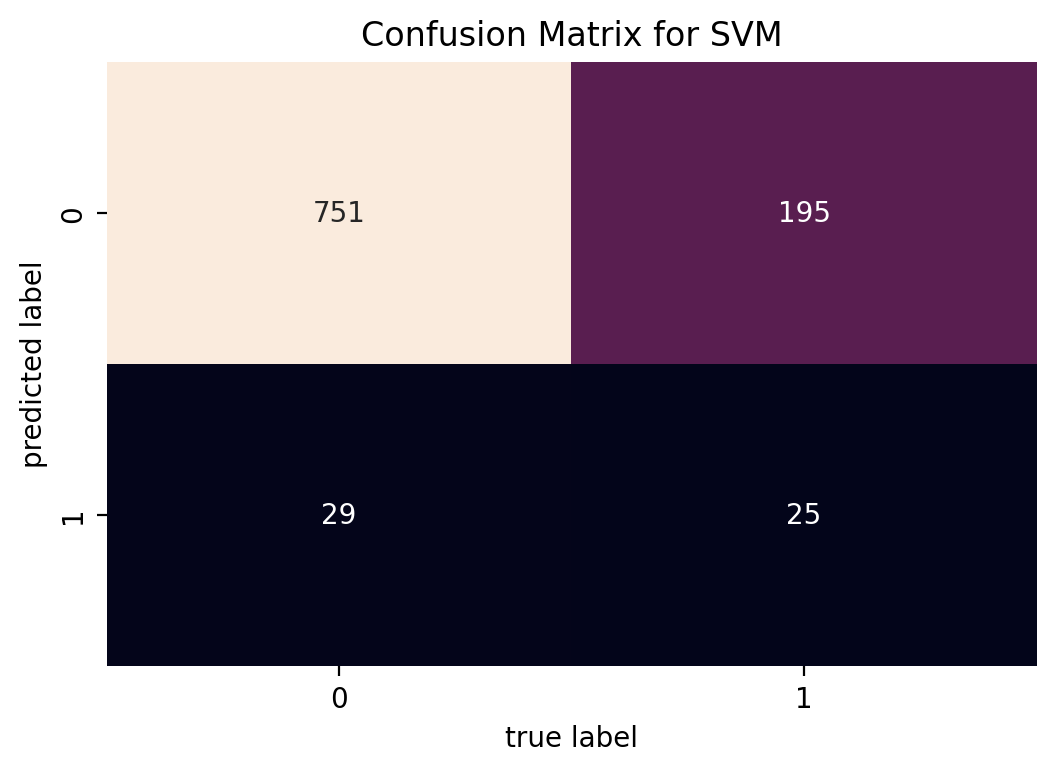

In [22]:

from sklearn.metrics import confusion_matrix

plt.figure(dpi=200)
mat = conf_mat
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for SVM')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion.png')
plt.show()

In [23]:
conf_mat

array([[751,  29],
       [195,  25]])

In [24]:
TP = conf_mat[1][1]
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]

In [25]:
accuracy= (TN+TP)/(TN+TP+FN+FP)
accuracy

0.776

In [26]:
precision= TP/(TP+FP)
precision

0.46296296296296297

In [27]:
recall= TP/(TP+FN)
recall

0.11363636363636363

In [28]:
f1_score= (precision*recall)/(precision+recall)
f1_score

0.09124087591240876